In [1]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

# 기본 URL
base_url = "https://finance.naver.com/marketindex/oilDailyQuote.naver"

# 크롤링 결과 저장 리스트
results = []

# 페이지 범위 지정 (예: 1페이지부터 5페이지까지)
for page in range(1, 6):
    # URL에 page 파라미터 추가
    params = {
        "marketindexCd": "OIL_GSL",
        "page": page
    }

    # 요청 보내기
    response = requests.get(base_url, params=params)
    response.raise_for_status()

    # BeautifulSoup으로 파싱
    soup = BeautifulSoup(response.text, "html.parser")

    # 테이블에서 행 데이터 찾기
    rows = soup.select("table.tbl_exchange tbody tr")

    for row in rows:
        # 각 열 데이터 추출
        cols = row.find_all("td")
        if len(cols) == 0:
            continue

        date = cols[0].text.strip()  # 날짜
        price = cols[1].text.strip()  # 가격

        # 결과 리스트에 추가
        results.append({
            "Date": date,
            "Price": price
        })

# DataFrame으로 변환
df = pd.DataFrame(results)

# 결과 확인
print(df)

# CSV로 저장
output_file = "oil_prices.csv"
df.to_csv(output_file, index=False, encoding="utf-8-sig")
print(f"크롤링 결과가 {output_file} 파일에 저장되었습니다.")


          Date     Price
0   2025.01.13  1,702.29
1   2025.01.12  1,699.24
2   2025.01.11  1,697.79
3   2025.01.10  1,695.38
4   2025.01.09  1,693.15
5   2025.01.08  1,690.07
6   2025.01.07  1,687.34
7   2025.01.06  1,683.84
8   2025.01.05  1,680.77
9   2025.01.04  1,679.44
10  2025.01.03  1,677.01
11  2025.01.02  1,674.74
12  2025.01.01  1,672.95
13  2024.12.31  1,670.85
14  2024.12.30  1,669.51
15  2024.12.29  1,668.00
16  2024.12.28  1,667.43
17  2024.12.27  1,666.66
18  2024.12.26  1,664.94
19  2024.12.25  1,663.66
20  2024.12.24  1,662.64
21  2024.12.23  1,661.13
22  2024.12.22  1,659.52
23  2024.12.21  1,658.88
24  2024.12.20  1,657.97
25  2024.12.19  1,656.28
26  2024.12.18  1,654.88
27  2024.12.17  1,653.35
28  2024.12.16  1,652.02
29  2024.12.15  1,650.27
30  2024.12.14  1,649.88
31  2024.12.13  1,649.12
32  2024.12.12  1,648.05
33  2024.12.11  1,646.96
34  2024.12.10  1,646.32
크롤링 결과가 oil_prices.csv 파일에 저장되었습니다.


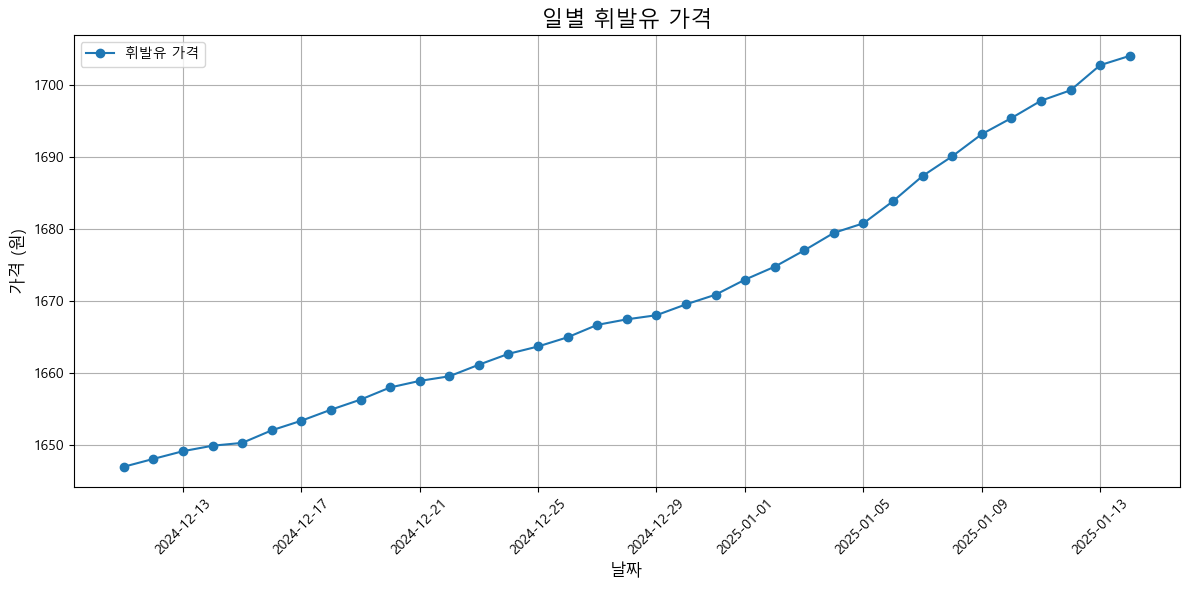

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc("font", family="Malgun Gothic")

# 기본 URL
base_url = "https://finance.naver.com/marketindex/oilDailyQuote.naver"

# 크롤링 결과 저장 리스트
results = []

# 페이지 범위 지정 (예: 1페이지부터 5페이지까지)
for page in range(1, 6):
    # URL에 page 파라미터 추가
    params = {
        "marketindexCd": "OIL_GSL",
        "page": page
    }

    # 요청 보내기
    response = requests.get(base_url, params=params)
    response.raise_for_status()

    # BeautifulSoup으로 파싱
    soup = BeautifulSoup(response.text, "html.parser")

    # 테이블에서 행 데이터 찾기
    rows = soup.select("table.tbl_exchange tbody tr")

    for row in rows:
        # 각 열 데이터 추출
        cols = row.find_all("td")
        if len(cols) == 0:
            continue

        date = cols[0].text.strip()  # 날짜
        price = cols[1].text.strip()  # 가격

        # 결과 리스트에 추가
        results.append({
            "날짜": date,
            "가격": price.replace(",", "")  # 가격의 쉼표 제거
        })

# DataFrame으로 변환
df = pd.DataFrame(results)

# 날짜를 시간 순으로 정렬
df["날짜"] = pd.to_datetime(df["날짜"], format="%Y.%m.%d")  # 점(.) 구분자를 사용한 포맷
df["가격"] = pd.to_numeric(df["가격"])  # 가격을 숫자로 변환
df = df.sort_values("날짜")

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df["날짜"], df["가격"], marker="o", linestyle="-", label="휘발유 가격")
plt.title("일별 휘발유 가격", fontsize=16)
plt.xlabel("날짜", fontsize=12)
plt.ylabel("가격 (원)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# 그래프 보여주기
plt.show()


In [4]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

# 기본 URL
base_url = "https://finance.naver.com/marketindex/oilDailyQuote.naver"


# 크롤링 결과 저장 리스트
results = []

# 페이지 범위 지정 (예: 1페이지부터 5페이지까지)
for page in range(1, 6):
    # URL에 page 파라미터 추가
    params = {
        "marketindexCd": "OIL_GSL",
        "page": page
    }

    # 요청 보내기
    response = requests.get(base_url, params=params)
    response.raise_for_status()

    # BeautifulSoup으로 파싱
    soup = BeautifulSoup(response.text, "html.parser")

    # 테이블에서 행 데이터 찾기
    rows = soup.select("table.tbl_exchange tbody tr")

    for row in rows:
        # 각 열 데이터 추출
        cols = row.find_all("td")
        if len(cols) == 0:
            continue

        date = cols[0].text.strip()  # 날짜
        price = cols[1].text.strip()  # 가격

        # 결과 리스트에 추가
        results.append({
            "Date": date,
            "Price": price
        })

# DataFrame으로 변환
df = pd.DataFrame(results)

# 결과 확인
print(df)

# DataFrame으로 변환
df = pd.DataFrame(results)

# 날짜를 시간 순으로 정렬
df["Date"] = pd.to_datetime(df["Date"], format="%Y.%m.%d")  # 점(.) 구분자를 사용한 포맷
df["Price"] = pd.to_numeric(df["Price"])  # 가격을 숫자로 변환
df = df.sort_values("Date")

# CSV로 저장
output_file = "oil__HGSL_prices.csv"
df.to_csv(output_file, index=False, encoding="utf-8-sig")
print(f"크롤링 결과가 {output_file} 파일에 저장되었습니다.")


          Date     Price
0   2025.01.14  1,704.02
1   2025.01.13  1,702.73
2   2025.01.12  1,699.24
3   2025.01.11  1,697.79
4   2025.01.10  1,695.38
5   2025.01.09  1,693.15
6   2025.01.08  1,690.07
7   2025.01.07  1,687.34
8   2025.01.06  1,683.84
9   2025.01.05  1,680.77
10  2025.01.04  1,679.44
11  2025.01.03  1,677.01
12  2025.01.02  1,674.74
13  2025.01.01  1,672.95
14  2024.12.31  1,670.85
15  2024.12.30  1,669.51
16  2024.12.29  1,668.00
17  2024.12.28  1,667.43
18  2024.12.27  1,666.66
19  2024.12.26  1,664.94
20  2024.12.25  1,663.66
21  2024.12.24  1,662.64
22  2024.12.23  1,661.13
23  2024.12.22  1,659.52
24  2024.12.21  1,658.88
25  2024.12.20  1,657.97
26  2024.12.19  1,656.28
27  2024.12.18  1,654.88
28  2024.12.17  1,653.35
29  2024.12.16  1,652.02
30  2024.12.15  1,650.27
31  2024.12.14  1,649.88
32  2024.12.13  1,649.12
33  2024.12.12  1,648.05
34  2024.12.11  1,646.96


KeyError: '날짜'